In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [2]:
removeData = [{'loc': [-8, -180],
              'startDate': datetime(2009, 7, 1),
              'endDate':   datetime(2009, 12, 1)},
              
              {'loc': [-2, 165],
              'startDate': datetime(2007, 10, 1),
              'endDate':   datetime(2008, 4, 1)},
              
              {'loc': [-2, -95],
              'startDate': datetime(2005, 5, 1),
              'endDate':   datetime(2005, 8, 1)},
              
              {'loc': [2, -155],
              'startDate': datetime(2009, 5, 1),
              'endDate':   datetime(2009, 12, 1)},
              
              {'loc': [0, -140],
              'startDate': datetime(2009, 9, 1),
              'endDate':   datetime(2010, 1, 1)},
              
              {'loc': [2, -110],
              'startDate': datetime(2000, 4, 1),
              'endDate':   datetime(2000, 10, 1)},
              
              {'loc': [0, -110],
              'startDate': datetime(2001, 10, 1),
              'endDate':   datetime(2002, 1, 1)},
              
              {'loc': [-5, -110],
              'startDate': datetime(2006, 3, 1),
              'endDate':   datetime(2006, 5, 1)}]

remove_df = pd.DataFrame(removeData)

remove_df

,loc,startDate,endDate
0,"[-8, -180]",2009-07-01,2009-12-01
1,"[-2, 165]",2007-10-01,2008-04-01
2,"[-2, -95]",2005-05-01,2005-08-01
3,"[2, -155]",2009-05-01,2009-12-01
4,"[0, -140]",2009-09-01,2010-01-01
5,"[2, -110]",2000-04-01,2000-10-01
6,"[0, -110]",2001-10-01,2002-01-01
7,"[-5, -110]",2006-03-01,2006-05-01


In [3]:
# ds= xr.open_dataset('/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/extractedGZ/WINDS/T_09N_140W_xrr_MatchUp_720_mins_2000.nc')
# ds

In [4]:
fld = '/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/TAO_data/WINDS/'
ds = xr.open_dataset(fld + '/T_008S_095W_COARE3p5_1999_2009_2hrMeanVar_CC_Buoy_Glorys_Wave_Matchup.nc')
                     #T_009N_140W_COARE3p5_1999_2009_2hrMeanVar_CC_Matchup.nc')
#ds = xr.open_dataset(fld + 'T_005S_140W_COARE3p5_1999_2009_2hrMeanVar_CC_Matchup.nc')
ds

<xarray.Dataset> Size: 6MB
Dimensions:          (CC_TIME: 8326, HEIGHT: 3, DEPTH: 1)
Coordinates:
    latitude         float64 8B ...
    longitude        float32 4B ...
  * CC_TIME          (CC_TIME) datetime64[ns] 67kB 2000-01-01 ... 2007-12-31T...
  * HEIGHT           (HEIGHT) float32 12B 3.0 4.0 10.0
  * DEPTH            (DEPTH) float32 4B 1.0
Data variables: (12/77)
    uwnd             (CC_TIME) float32 33kB ...
    vwnd             (CC_TIME) float32 33kB ...
    ws               (CC_TIME) float32 33kB ...
    nobs             (CC_TIME) float32 33kB ...
    WDIR             (CC_TIME, HEIGHT) float32 100kB ...
    WDIR_QC          (CC_TIME, HEIGHT) float32 100kB ...
    ...               ...
    vo               (CC_TIME) float64 67kB ...
    zos              (CC_TIME) float64 67kB ...
    uo               (CC_TIME) float64 67kB ...
    thetao           (CC_TIME) float64 67kB ...
    so               (CC_TIME) float64 67kB ...
    GLORYS_TIME      (CC_TIME) datetime64[ns] 67kB ...
Attributes: (12/54)
    contact:                       Remote Sensing Systems, support@remss.com
    Conventions:                   CF-1.7 ACDD-1.3
    data_structure:                grid
    title:                         RSS CCMP V3.1 6-hourly surface winds (Leve...
    summary:                       RSS VAM 6-hour analyses using ERA-5 wind r...
    institute_id:                  RSS
    ...                            ...
    time_coverage_end:             2000-01-01T23:59:59Z
    platform:                      Space-based Platforms>Earth Observation Sa...
    instrument:                    Earth Remote Sensing Instruments>Passive R...
    history:                       2024-04-01T18:28:35.496946Z - netCDF gener...
    base_date:                     Y2000 M01 D01
    date_created:                  2024-04-01T18:28:35.496946Z

In [5]:
print(list(np.unique(ds.WSPD_QC.to_numpy())))
print(list(np.unique(ds.WDIR_QC.to_numpy())))
print(list(np.unique(ds.SST_QC.to_numpy())))
print(list(np.unique(ds.RELH_QC.to_numpy())))
print(list(np.unique(ds.AIRT_QC.to_numpy())))                                                                                                                                                                                          

[np.float32(2.0), np.float32(nan)]
[np.float32(2.0), np.float32(nan)]
[np.float32(2.0)]
[np.float32(2.0), np.float32(nan)]
[np.float32(2.0), np.float32(nan)]


In [6]:
list(ds.variables.keys())

['uwnd',
 'vwnd',
 'ws',
 'nobs',
 'latitude',
 'longitude',
 'CC_TIME',
 'HEIGHT',
 'DEPTH',
 'WDIR',
 'WDIR_QC',
 'WDIR_DM',
 'WSPD',
 'WSPD_QC',
 'WSPD_DM',
 'UWND',
 'VWND',
 'SST',
 'SST_QC',
 'SST_DM',
 'AIRT',
 'AIRT_QC',
 'AIRT_DM',
 'RELH',
 'RELH_QC',
 'RELH_DM',
 'WSPD_10N',
 'WSPD_10',
 'SST - AIRT',
 'cosWDIR',
 'sinWDIR',
 'U10N_x',
 'U10N_y',
 'mean_WSPD',
 'std_WSPD',
 'mean_WDIR',
 'std_WDIR',
 'mean_cosWDIR',
 'std_cosWDIR',
 'mean_sinWDIR',
 'std_sinWDIR',
 'mean_WSPD_10N',
 'std_WSPD_10N',
 'mean_U10N_x',
 'std_U10N_x',
 'mean_U10N_y',
 'std_U10N_y',
 'mean_SST',
 'std_SST',
 'mean_AIRT',
 'std_AIRT',
 'mean_RELH',
 'std_RELH',
 'mean_SST - AIRT',
 'std_SST - AIRT',
 'TAO_TIME',
 'fillNaN_wave',
 'fillNaN_glorys',
 'VHM0',
 'VHM0_SW1',
 'VHM0_SW2',
 'VHM0_WW',
 'VMDR',
 'VMDR_SW1',
 'VMDR_SW2',
 'VMDR_WW',
 'VPED',
 'VSDX',
 'VSDY',
 'VTM01_SW1',
 'VTM01_SW2',
 'VTM01_WW',
 'VTM02',
 'VTM10',
 'VTPK',
 'WAVE_TIME',
 'vo',
 'zos',
 'uo',
 'thetao',
 'so',
 'GLORYS_TI

In [7]:
def getSubDF(ds, LAT, LON, remove_df):
    if [LAT, LON] in remove_df['loc'].tolist():
        print(f'MANUAL REMOVAL OF DATA IN LOC {LAT} {LON}')
        # Find index of matching location
        rindx = remove_df.index[remove_df['loc'].apply(lambda x: x == [LAT, LON])].tolist()[0]
        
        # Convert start and end dates to datetime64
        startDate = np.array(remove_df.loc[rindx, 'startDate'], dtype='datetime64[ns]')
        endDate = np.array(remove_df.loc[rindx, 'endDate'], dtype='datetime64[ns]')
        
        # Get time array from dataset
        dates = ds['CC_TIME'].to_numpy()
        
        # Create Boolean mask for time range
        mask = (dates >= startDate) & (dates < endDate)
        
        # Drop data within that time range
        ds = ds.sel(CC_TIME=~mask)

    LON = (LON+360)%360
        
    subds = xr.Dataset()

    taoTimeVar = ['TAO_TIME']
    
    windVars = ['WDIR',
         'WDIR_QC',
         'WDIR_DM',
         'WSPD',
         'WSPD_QC',
         'WSPD_DM',
         'UWND',
         'VWND']

    sstVars = ['SST',
             'SST_QC',
             'SST_DM']
    
    airtVars = ['AIRT',
             'AIRT_QC',
             'AIRT_DM']
    
    rhVars = ['RELH',
             'RELH_QC',
             'RELH_DM']
    
    u10Vars =['WSPD_10N',
             'WSPD_10']

    statVars= [f'mean_WSPD',
               f'std_WSPD',
               f'mean_WSPD_10N',
               f'std_WSPD_10N',
               f'mean_U10N_x',
               f'std_U10N_x',
               f'mean_U10N_y',
               f'std_U10N_y',
               f'mean_WDIR',
               f'std_WDIR',
               f'mean_cosWDIR',
               f'std_cosWDIR',
               f'mean_sinWDIR',
               f'std_sinWDIR',
               f'mean_SST',
               f'std_SST',
               f'mean_AIRT',
               f'std_AIRT',
               f'mean_SST - AIRT',
               f'std_SST - AIRT',
               f'mean_RELH',
               f'std_RELH',]
    
    
    satVars = ['uwnd',
             'vwnd',
             'ws',
             'nobs',
             'latitude',
             'longitude']

    waveVars = ['VHM0',
                 'VHM0_SW1',
                 'VHM0_SW2',
                 'VHM0_WW',
                 'VMDR',
                 'VMDR_SW1',
                 'VMDR_SW2',
                 'VMDR_WW',
                 'VPED',
                 'VSDX',
                 'VSDY',
                 'VTM01_SW1',
                 'VTM01_SW2',
                 'VTM01_WW',
                 'VTM02',
                 'VTM10',
                 'VTPK',
                 'WAVE_TIME']

    oceanVars = ['vo',
                 'zos',
                 'uo',
                 'thetao',
                 'so',
                 'GLORYS_TIME']

     
    
    for windVar in windVars:
        subds[windVar] = ds[windVar].sel(HEIGHT=4)
    subds.drop_vars('HEIGHT')
    for sstVar in sstVars:
        subds[sstVar] = ds[sstVar].sel(DEPTH=1)
    subds.drop_vars('DEPTH')
    for rhVar in rhVars:
        subds[rhVar] = ds[rhVar].sel(HEIGHT=3)
    subds.drop_vars('HEIGHT')
    for airtVar in airtVars:
        subds[airtVar] = ds[airtVar].sel(HEIGHT=3)
    subds.drop_vars('HEIGHT')
    for u10Var in u10Vars:
        subds[u10Var] = ds[u10Var].sel(HEIGHT=10)
    subds.drop_vars('HEIGHT')


    for var in waveVars:
        subds[var] = ds[var]

    for var in oceanVars:
        subds[var] = ds[var]

    for statVar in statVars:
        subds[statVar] = ds[statVar]

    subds['LATITUDE'] = xr.DataArray(LAT * np.ones(len(subds['CC_TIME']), dtype = float), dims=['CC_TIME'])
    subds['LONGITUDE'] = xr.DataArray(LON * np.ones(len(subds['CC_TIME']), dtype = float), dims=['CC_TIME'])
    
    subds['TAO_TIME'] = ds['TAO_TIME']

    deployFileName = f'/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/TAO_data/WINDS/T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}/T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}_DeploymentDates.nc'
    ds2 = xr.open_dataset(deployFileName)
    startDates = np.array(ds2['startDate'])
    endDates = np.array(ds2['endDate'])

    depNum = np.zeros((len(subds['CC_TIME'])), dtype=int)
    c = 1
    for i in range(1,len(startDates)):
        mask = subds['CC_TIME'] >= startDates[i]
        mask *= subds['CC_TIME'] <= endDates[i]
        depNum[mask] = c
        c = c+1

    subds['Deployment index'] = xr.DataArray(depNum, dims=['CC_TIME'])
    
    satDS = ds[satVars]
    
    returnDS = xr.merge((subds, satDS))

    
    
    return returnDS

In [8]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)


allDS = xr.Dataset()
dataCount = 0
fileCount = 0
for task in taskList:
    lat = task[0]
    lon = task[1]

    LAT = lat
    LON = lon

    if lat < 0:
        latUnits = 'S'
    else:
        latUnits = 'N'

    if lon < 0:
        lonUnits = 'W'
    else:
        lonUnits = 'E'

    #LON = (LON+360)%360
    lat=abs(lat)
    lon=abs(lon)

    matchFname = f'/srv/data2/srai_poseidon/srai_poseidon/observation/SatelliteVsBuoy/downloads/Buoy/TAO_data/WINDS/T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}_COARE3p5_1999_2009_2hrMeanVar_CC_Buoy_Glorys_Wave_Matchup.nc'
    #deployFileName = f'../../downloads/Buoy/extractedGZ/WINDS/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}/T_{lat:02d}{latUnits}_{lon:03d}{lonUnits}_DeploymentDates.nc'
    
    if os.path.isfile(matchFname):
        print(f'T_{lat:03d}{latUnits}_{lon:03d}{lonUnits}')
        rds = xr.open_dataset(matchFname)
        ds = getSubDF(rds, LAT, LON, remove_df)
        CC_TIME = ds['CC_TIME'].to_numpy()
        ds = ds.rename({'CC_TIME':'count'})
        dataLen = len(ds['count'])
        print(dataCount, dataCount+dataLen)
        ds['count'] = xr.DataArray(pd.Series(np.arange(dataCount, dataCount+dataLen)), 
                                   dims = ['count'])
        ds['CC_TIME'] = xr.DataArray(CC_TIME, 
                                   dims = ['count'])
        dataCount += dataLen
        if fileCount == 0:
            allDS = ds
        else:
            allDS = xr.concat((allDS, ds), dim='count')
        fileCount += 1
        

T_008S_095W
0 8326
T_008S_110W
8326 13000
T_008S_125W
13000 18437
T_008S_155W
18437 24458
T_008S_170W
24458 31863
T_008S_180W
MANUAL REMOVAL OF DATA IN LOC -8 -180
31863 38743
T_008S_165E
38743 44380
T_005S_095W
44380 50943
T_005S_110W
MANUAL REMOVAL OF DATA IN LOC -5 -110
50943 58949
T_005S_125W
58949 67157
T_005S_140W
67157 75784
T_005S_155W
75784 79687
T_005S_170W
79687 86031
T_005S_180W
86031 92392
T_005S_165E
92392 101343
T_002S_095W
MANUAL REMOVAL OF DATA IN LOC -2 -95
101343 102951
T_002S_110W
102951 106880
T_002S_125W
106880 116254
T_002S_140W
116254 124344
T_002S_155W
124344 131565
T_002S_170W
131565 136970
T_002S_180W
136970 146475
T_002S_165E
MANUAL REMOVAL OF DATA IN LOC -2 165
146475 151009
T_000N_095W
151009 155973
T_000N_110W
MANUAL REMOVAL OF DATA IN LOC 0 -110
155973 162305
T_000N_125W
162305 169405
T_000N_140W
MANUAL REMOVAL OF DATA IN LOC 0 -140
169405 179339
T_000N_155W
179339 188229
T_000N_170W
188229 197131
T_000N_180W
197131 202207
T_000N_165E
202207 205583
T_002

In [9]:
allDS = allDS.drop_vars(['HEIGHT','DEPTH'])

In [30]:
allDS

<xarray.Dataset> Size: 192MB
Dimensions:           (count: 373745)
Coordinates:
    latitude          (count) float64 3MB -8.125 -8.125 -8.125 ... 8.875 8.875
    longitude         (count) float32 1MB 264.9 264.9 264.9 ... 219.9 219.9
  * count             (count) int64 3MB 0 1 2 3 ... 373741 373742 373743 373744
Data variables: (12/74)
    WDIR              (count) float32 1MB 122.1 135.9 148.9 ... 203.8 208.6
    WDIR_QC           (count) float32 1MB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    WDIR_DM           (count) |S1 374kB b'D' b'D' b'D' b'D' ... b'D' b'D' b'D'
    WSPD              (count) float32 1MB 5.52 5.75 6.65 6.36 ... 8.42 10.6 8.82
    WSPD_QC           (count) float32 1MB 2.0 2.0 2.0 2.0 ... 2.0 2.0 2.0 2.0
    WSPD_DM           (count) |S1 374kB b'D' b'D' b'D' b'D' ... b'D' b'D' b'D'
    ...                ...
    Deployment index  (count) int64 3MB 7 7 7 7 7 7 7 7 ... 19 19 19 19 19 19 19
    uwnd              (count) float32 1MB -2.609 -3.924 -4.766 ... -8.556 -9.677
    vwnd              (count) float32 1MB 4.648 4.761 6.335 ... -2.505 -4.095
    ws                (count) float32 1MB 5.33 6.17 7.928 ... 10.89 8.916 10.51
    nobs              (count) float32 1MB 1.0 3.0 1.0 1.0 ... 2.0 1.0 0.0 3.0
    CC_TIME           (count) datetime64[ns] 3MB 2000-01-01 ... 2007-12-31T18...

In [31]:
mask1 = allDS['WSPD_QC'].isin([1,2]).to_numpy()
mask2 = allDS['WDIR_QC'].isin([1,2]).to_numpy()
mask3 = allDS['SST_QC'].isin([1,2]).to_numpy()
mask4 = allDS['RELH_QC'].isin([1,2]).to_numpy()
mask5 = allDS['AIRT_QC'].isin([1,2]).to_numpy()

In [32]:
#selectMask = np.logical_and(noRainMask, mask1)
selectMask = np.logical_and(mask1, mask2)
selectMask = np.logical_and(selectMask, mask3)
selectMask = np.logical_and(selectMask, mask4)
selectMask = np.logical_and(selectMask, mask5)

In [33]:
indices = selectMask.nonzero()[0]
goodDataSet = allDS.sel(count=indices)

In [34]:
varList = list(goodDataSet.variables.keys())
varList = ['WSPD', 'WDIR', 'SST', 'RELH', 'AIRT',
           'mean_WSPD', 'mean_WDIR', 'mean_SST', 'mean_RELH', 'mean_AIRT', 'mean_SST - AIRT',
           'std_WSPD', 'std_WDIR', 'std_SST', 'std_RELH', 'std_AIRT', 'std_SST - AIRT',
           'std_cosWDIR', 'std_sinWDIR',
           'std_U10N_x','std_U10N_y', 
           'uwnd', 'vwnd']

var = varList[0]
mask = np.isnan(goodDataSet[var].to_numpy())
print(var, np.sum(mask))

for var in varList[1::]:
    old = np.sum(mask)
    mask = np.logical_or(mask, np.isnan(goodDataSet[var].to_numpy()))
    print(var, np.sum(mask) - old)

print('total', np.sum(mask))



df = goodDataSet.isel(count = ~mask)
len(df['count'].values)
#df = df.to_dataframe()

WSPD 0
WDIR 0
SST 0
RELH 0
AIRT 0
mean_WSPD 948
mean_WDIR 0
mean_SST 0
mean_RELH 0
mean_AIRT 0
mean_SST - AIRT 0
std_WSPD 0
std_WDIR 0
std_SST 1899
std_RELH 13
std_AIRT 2
std_SST - AIRT 0
std_cosWDIR 16
std_sinWDIR 0
std_U10N_x 0
std_U10N_y 0
uwnd 115
vwnd 0
total 2993


370752

In [35]:
goodDataSet = goodDataSet.rename_vars({'WSPD':'WSPD (TAO)',
                  'WDIR':'WDIR (TAO)',
                  'UWND': 'UWND (TAO)',
                  'VWND': 'VWND (TAO)',
                  'SST': 'SST (TAO)',
                  'RELH': 'RELH (TAO)',
                  'AIRT': 'AIRT (TAO)',
                  'WSPD_10N': 'WSPD_10N (TAO)',
                  'WSPD_10': 'WSPD_10 (TAO)',
                  'latitude': 'CCMP_latitude',
                  'longitude': 'CCMP_longitude',
                  'uwnd':'UWND_10N (CCMP)',
                  'vwnd':'VWND_10N (CCMP)',
                  # 'retrieved_wind_speed': 'WSPD_10N (CCMP)',
                  # 'retrieved_wind_direction': 'WDIR (CCMP)',
                  'mean_U10N_x': 'mean_UWND_10N', 
                  'mean_U10N_y': 'mean_VWND_10N',
                  'std_U10N_x': 'std_UWND_10N', 
                  'std_U10N_y': 'std_VWND_10N',})

In [36]:
df = df.rename_vars({'WSPD':'WSPD (TAO)',
                  'WDIR':'WDIR (TAO)',
                  'UWND': 'UWND (TAO)',
                  'VWND': 'VWND (TAO)',
                  'SST': 'SST (TAO)',
                  'RELH': 'RELH (TAO)',
                  'AIRT': 'AIRT (TAO)',
                  'WSPD_10N': 'WSPD_10N (TAO)',
                  'WSPD_10': 'WSPD_10 (TAO)',
                  'latitude': 'CCMP_latitude',
                  'longitude': 'CCMP_longitude',
                  'uwnd':'UWND_10N (CCMP)',
                  'vwnd':'VWND_10N (CCMP)',
                  # 'retrieved_wind_speed': 'WSPD_10N (CCMP)',
                  # 'retrieved_wind_direction': 'WDIR (CCMP)',
                  'mean_U10N_x': 'mean_UWND_10N', 
                  'mean_U10N_y': 'mean_VWND_10N',
                  'std_U10N_x': 'std_UWND_10N', 
                  'std_U10N_y': 'std_VWND_10N',})

In [37]:
df['WSPD_10N (CCMP)'] = np.sqrt(df['UWND_10N (CCMP)']**2 + df['VWND_10N (CCMP)']**2)

direction_CC = np.rad2deg(np.arctan2(df['VWND_10N (CCMP)'],
                                     df['UWND_10N (CCMP)']))

direction_CC = (direction_CC+360)%360
df['WDIR (CCMP)'] = direction_CC

In [38]:
df['WSPD_DIFF (CCMP - TAO)'] = df['WSPD_10N (CCMP)'] - df['WSPD_10N (TAO)']

## calculate zonal and meridional winds 
df['UWND_10N (TAO)'] = df['WSPD_10N (TAO)'] * np.cos(np.deg2rad(df['WDIR (TAO)']))
df['VWND_10N (TAO)'] = df['WSPD_10N (TAO)'] * np.sin(np.deg2rad(df['WDIR (TAO)']))

# df['UWND_10N (CCMP)'] = df['WSPD_10N (CCMP)'] * np.cos(np.deg2rad(df['WDIR (CCMP)']))
# df['VWND_10N (CCMP)'] = df['WSPD_10N (CCMP)'] * np.sin(np.deg2rad(df['WDIR (CCMP)']))

#### Speed and direction CC corrected to absolute using GLORYS
df['UWND (CCMP) absolute'] = df['UWND_10N (CCMP)'] + df['uo']
df['VWND (CCMP) absolute'] = df['VWND_10N (CCMP)'] + df['vo']

absolute_direction_CC = np.rad2deg(np.arctan2(df['VWND (CCMP) absolute'],
                                              df['UWND (CCMP) absolute']))

absolute_direction_CC = (absolute_direction_CC+360)%360

df['WDIR (CCMP) absolute'] = absolute_direction_CC

## direction diff in range (-180,180)
dirDiff = ((df['WDIR (CCMP)'] - df['WDIR (TAO)'])+360)%360
dirDiff = xr.where(dirDiff > 180, dirDiff-360, dirDiff)
df['WDIR_DIFF (CCMP - TAO)'] = dirDiff
df['cos(WDIR_DIFF (CCMP - TAO))'] = np.cos(np.deg2rad(dirDiff))
df['sin(WDIR_DIFF (CCMP - TAO))'] = np.sin(np.deg2rad(dirDiff))

df['UWND_DIFF (CCMP - TAO)'] = df['UWND_10N (CCMP)'] - df['UWND_10N (TAO)']
df['VWND_DIFF (CCMP - TAO)'] = df['VWND_10N (CCMP)'] - df['VWND_10N (TAO)']

## direction diff in range (-180,180) with absolute
dirDiff = ((df['WDIR (CCMP) absolute'] - df['WDIR (TAO)'])+360)%360
dirDiff = xr.where(dirDiff > 180, dirDiff-360, dirDiff)
df['WDIR_DIFF (CCMP - TAO) absolute'] = dirDiff
df['cos(WDIR_DIFF (CCMP - TAO)) absolute'] = np.cos(np.deg2rad(dirDiff))
df['sin(WDIR_DIFF (CCMP - TAO)) absolute'] = np.sin(np.deg2rad(dirDiff))

df['UWND_DIFF (CCMP - TAO) absolute'] = df['UWND (CCMP) absolute'] - df['UWND_10N (TAO)']

df['VWND_DIFF (CCMP - TAO) absolute'] = df['VWND (CCMP) absolute'] - df['VWND_10N (TAO)']


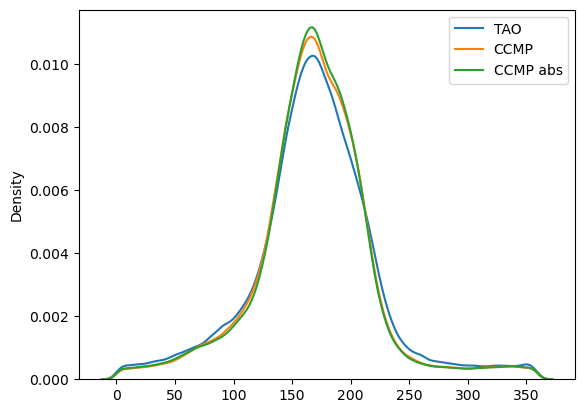

In [39]:
sns.kdeplot(df['WDIR (TAO)'], label = 'TAO',)
sns.kdeplot(df['WDIR (CCMP)'], label = 'CCMP')
sns.kdeplot(df['WDIR (CCMP) absolute'], label = 'CCMP abs')
plt.legend()

In [40]:
df

<xarray.Dataset> Size: 236MB
Dimensions:                               (count: 370752)
Coordinates:
    CCMP_latitude                         (count) float64 3MB -8.125 ... 8.875
    CCMP_longitude                        (count) float32 1MB 264.9 ... 219.9
  * count                                 (count) int64 3MB 0 1 ... 373744
Data variables: (12/92)
    WDIR (TAO)                            (count) float32 1MB 122.1 ... 208.6
    WDIR_QC                               (count) float32 1MB 2.0 2.0 ... 2.0
    WDIR_DM                               (count) |S1 371kB b'D' b'D' ... b'D'
    WSPD (TAO)                            (count) float32 1MB 5.52 5.75 ... 8.82
    WSPD_QC                               (count) float32 1MB 2.0 2.0 ... 2.0
    WSPD_DM                               (count) |S1 371kB b'D' b'D' ... b'D'
    ...                                    ...
    VWND_DIFF (CCMP - TAO)                (count) float64 3MB -0.4804 ... 0.488
    WDIR_DIFF (CCMP - TAO) absolute       (count) float64 3MB -0.9328 ... -7.615
    cos(WDIR_DIFF (CCMP - TAO)) absolute  (count) float64 3MB 0.9999 ... 0.9912
    sin(WDIR_DIFF (CCMP - TAO)) absolute  (count) float64 3MB -0.01628 ... -0...
    UWND_DIFF (CCMP - TAO) absolute       (count) float64 3MB 0.4131 ... -1.475
    VWND_DIFF (CCMP - TAO) absolute       (count) float64 3MB -0.4926 ... 0.7932

In [41]:
df.to_netcdf('CCMP_waveAndGlorysAdded_manualRemovedSomeData.nc')